# Plotting data from an Excel file

> **Dataset:**
> Salter, Ian; Bauerfeind, Eduard; Nöthig, Eva-Maria; von Appen, Wilken-Jon; Lochthofen, Normen; Soltwedel, Thomas; Schewe, Ingo (2018):
> Physical oceanography and current meter data from mooring HG-N-FEVI-33 at Hausgarten North. 
> Alfred Wegener Institute, Helmholtz Centre for Polar and Marine Research, Bremerhaven, 
> PANGAEA, https://doi.pangaea.de/10.1594/PANGAEA.884546 

In this first example, the data is stored in an Microsoft Excel file.

* The data is read in from the Excel file and stored into a data frame
* Column names are modified for easy handling
* Data is plotted using ggplot2 


All libraries can be found in the *Tidyverse* metapackage. If necessary, you can install them as follows:

> install.packages("tidyverse")"

In [1]:
library("readxl")
library("lubridate")
library("ggplot2")


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



### Read the data from an Excel file

Please note: The data contains some header lines, that should be skipped (23 in this case).


In [2]:
data = read_excel("data/example1.xlsx",sheet = 1,skip = 23)
head(data)

Date/Time,Gear ID,Depth water [m],Press [dbar],Temp [°C],Sal,CV hor [cm/s],DIR [deg],UC [cm/s],VC [cm/s],O2 [µmol/l]
2016-07-05T08:00,2,320.8,324.4,3050.000,NA,14.10,242.4,-12.49,-6.54,NA
2016-07-05T08:00,3,2419.5,2459.7,-0.743,NA,13.20,258.5,-12.93,-2.63,NA
2016-07-05T08:00,4,2584.4,2628.4,-0.743,NA,12.29,236.8,-10.28,-6.72,NA
2016-07-05T09:00,2,322.7,326.4,3093.000,NA,16.76,235.9,-13.87,-9.41,NA
2016-07-05T09:00,3,2419.5,2459.7,-0.743,NA,12.03,237.1,-10.09,-6.54,NA
2016-07-05T09:00,4,2584.6,2628.5,-0.742,NA,12.62,225.0,-8.92,-8.93,NA


The original column names appear to be quite unhandy, so they are changed first.

In [3]:
orig<-names(data)
orig

names(data)<-c('date','gearId','depth','press','temp','sal','cv','dir','uc','vc','o2')

data$gearId<-as.factor(data$gearId)
names(data)

[1] "Date/Time"       "Gear ID"         "Depth water [m]" "Press [dbar]"   
 [5] "Temp [°C]"       "Sal"             "CV hor [cm/s]"   "DIR [deg]"      
 [9] "UC [cm/s]"       "VC [cm/s]"       "O2 [µmol/l]"

[1] "date"   "gearId" "depth"  "press"  "temp"   "sal"    "cv"     "dir"   
 [9] "uc"     "vc"     "o2"

### Plotting the data

The dataset contains measurements of four devices mounted on a mooring at different depths. The plots show the depths of these devices over time, with the temperature value color coded.

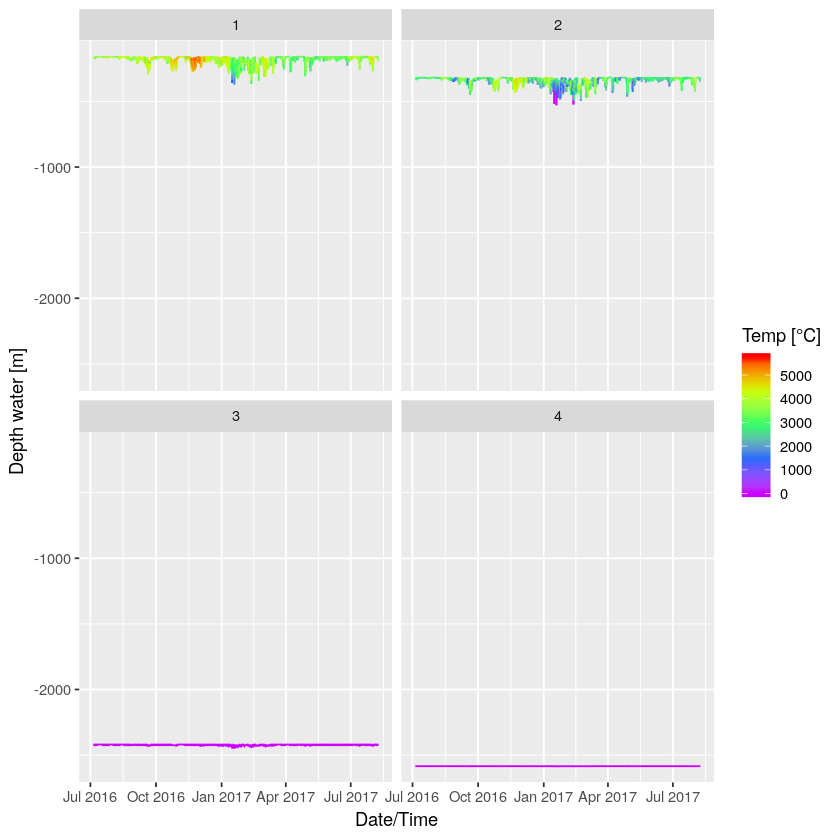

In [7]:
ggplot(data=data)+#[data$gearId==3 | data$gearId==4 ,])+
    geom_line(mapping = aes(x=ymd_hm(date),y=-depth,color=temp)) +
    scale_color_gradientn(colors = rev(rainbow(5)), name = orig[5])+
    #geom_smooth(mapping = aes(x=ymd_hm(date),y=-depth)) +
    xlab(orig[1]) + 
    ylab(orig[3]) +
    facet_wrap(~gearId, nrow=2)

Now, show only the first plot:

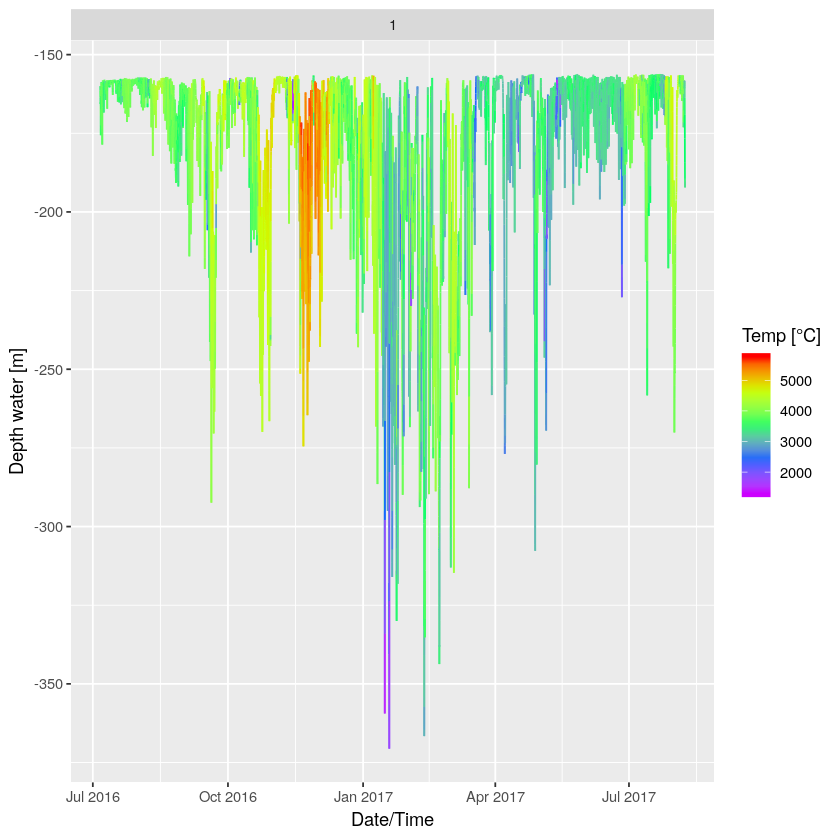

In [11]:
ggplot(data=data[data$gearId==1 ,])+
    geom_line(mapping = aes(x=ymd_hm(date),y=-depth,color=temp)) +
    scale_color_gradientn(colors = rev(rainbow(5)), name = orig[5])+
    xlab(orig[1]) + 
    ylab(orig[3]) +
    facet_wrap(~gearId, nrow=2)

and save the plot in file 'plot.png':

In [12]:
ggsave("plot.png")

Saving 6.67 x 6.67 in image
